# Online retail: K-means clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt

### 1. Use 'Online retail.csv'. Standardize the three variables: Sales, OrderCount, AvgOrderValue.

In [2]:
df = pd.read_csv('Online retail.csv')
df.head()

,CustomerID,Sales,OrderCount,AvgOrderValue
0,12346,77183.60200,1,77183.602000
1,12347,4310.00000,182,23.681318
2,12348,1797.24000,31,57.975483
3,12349,1757.55000,73,24.076029
4,12350,334.39999,17,19.670588


In [3]:
# Standardize the variables

df['z_Sales']=preprocessing.scale(df.Sales)
df['z_OrdCnt']=preprocessing.scale(df.OrderCount)
df['z_AvgOrdVal']=preprocessing.scale(df.AvgOrderValue)
df.describe()

,CustomerID,Sales,OrderCount,AvgOrderValue,z_Sales,z_OrdCnt,z_AvgOrdVal
count,4338.000000,4338.000000,4338.000000,4338.000000,4.338000e+03,4.338000e+03,4.338000e+03
mean,15300.408022,2054.266465,91.720609,68.350506,-4.816277e-18,-3.464648e-18,-9.511787e-18
std,1721.808492,8989.230589,228.785094,1467.918920,1.000115e+00,1.000115e+00,1.000115e+00
min,12346.000000,3.750000,1.000000,2.101286,-2.281344e-01,-3.965777e-01,-4.513659e-02
25%,13813.250000,307.414990,17.000000,12.365366,-1.943495e-01,-3.266350e-01,-3.814352e-02
50%,15299.500000,674.485015,41.000000,17.723118,-1.535104e-01,-2.217210e-01,-3.449320e-02
75%,16778.750000,1661.739975,100.000000,24.858417,-4.367134e-02,3.619268e-02,-2.963182e-02
max,18287.000000,280206.030000,7847.000000,77183.602000,3.094634e+01,3.390157e+01,5.253978e+01


- `df['z_Sales']=preprocessing.scale(df.Sales)`: This line applies the scale function to the 'Sales' column and creates a new column, 'z_Sales' with the standardized values.

### 2. Use the three standardized variables. Use the elbow method to determine the number of clusters. How many clusters would you choose?

Text(0, 0.5, 'Sum of Squared Errors')

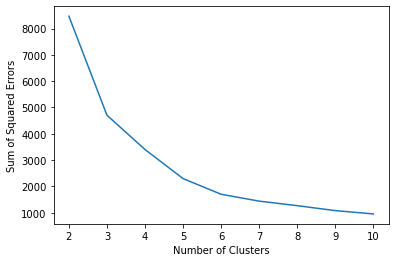

In [4]:
# Run k-means clustering with k=2~10. Plot the errors corresponding to each k.

ss = []
krange = range(2,11)  # 2~10
x=df[['z_Sales', 'z_OrdCnt', 'z_AvgOrdVal']]
for i in krange:
    m = cluster.KMeans(n_clusters=i).fit(x)
    error = m.inertia_
    ss.append(error)
    
plt.plot(krange, ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')

- `ss = []`: initialize an empty list ss to store the sum of squared distances of samples to their nearest cluster center
- `krange = range(2,11)`: defines a range of cluster numbers to be tested (from 2 to 10).
- range(start, stop, step)
    - `start` (optional): The starting value. If omitted, it defaults to 0.
    - `stop`: The stopping value (not inclusive)
    - `step` (optional): The step or increment between each number in the sequence. If omitted, it defaults to 1.        
- The for loop iterates over each intended cluster size:
    - `m = cluster.KMeans(n_clusters=i).fit(x)`: For each number of clusters, a k-means clustering model is fitted on the data x.
    - `error = m.inertia_`: After fitting the model, the inertia (sum of squared distances of samples to their closest cluster center) is stored in the variable `error`.
    - `ss.append(error)`: The calculated error is appended to the list `ss`.
- `plt.plot(krange, ss)`: plots the number of clusters (x) against the inertia (y).

- 5 or 6 clusters seems reasonable

### 3. Conduct k-means clustering using the best number of clusters you found. Add predicted cluster labels to the data

In [5]:
m = cluster.KMeans(n_clusters=5, random_state=10).fit(x)
df['cluster'] = m.labels_  # cluster labels
df.head()

,CustomerID,Sales,OrderCount,AvgOrderValue,z_Sales,z_OrdCnt,z_AvgOrdVal,cluster
0,12346,77183.60200,1,77183.602000,8.358668,-0.396578,52.539783,1
1,12347,4310.00000,182,23.681318,0.250966,0.394649,-0.030434,0
2,12348,1797.24000,31,57.975483,-0.028596,-0.265435,-0.007069,0
3,12349,1757.55000,73,24.076029,-0.033012,-0.081836,-0.030165,0
4,12350,334.39999,17,19.670588,-0.191347,-0.326635,-0.033166,0


- `m = cluster.KMeans(n_clusters=5, random_state=10).fit(x)`: This line initializes a k-means clustering model with five clusters (n_clusters=5) and a random state for reproducibility (random_state=10).
    - The model is then fitted to x.
- `df['cluster'] = m.labels_`: After the model is fitted, you can access the labels assigned to each point via m.labels_.
    - These labels are added as a new 'cluster' column. Each entry in this column represents the cluster number (from 0 to 4) to which the corresponding data point has been assigned.

### 4. Which customer segment has the highest and lowest sales?

In [6]:
# Inspect cluster centers

print(m.cluster_centers_)
df.groupby('cluster').mean()  # alternative

[[-1.06502271e-01 -1.39660632e-01 -2.41350006e-02]
 [ 1.34369350e+01 -3.92206284e-01  4.53770828e+01]
 [ 7.66238663e+00  2.49838753e+01 -3.79401003e-02]
 [ 2.15045851e+01  3.93374898e+00  1.67844635e-01]
 [ 9.73019567e-01  1.63220697e+00  2.32756527e-02]]


,CustomerID,Sales,OrderCount,AvgOrderValue,z_Sales,z_OrdCnt,z_AvgOrdVal
cluster,,,,,,,
0,15301.838391,1097.003350,59.772021,32.926366,-0.106502,-0.139661,-0.024135
1,14396.000000,122828.051000,2.000000,66670.551000,13.436935,-0.392206,45.377083
2,14899.000000,70925.287250,5807.000000,12.663935,7.662387,24.983875,-0.037940
3,15353.800000,195341.658000,991.600000,314.704422,21.504585,3.933749,0.167845
4,15290.737226,10799.955512,465.102190,102.513339,0.973020,1.632207,0.023276


- `m.cluster_centers_`: This attribute of the fitted k-means model m contains the centroids of the formed clusters. 
    - Each centroid is represented by a point in the feature space that corresponds to the mean of all points in that cluster. 
- `df.groupby('cluster')`: splits the DataFrame into groups based on the 'cluster' column.
    - `mean()`: calculates the mean value for each feature within each cluster. 

* Cluster 3 has the highest sales
* Cluster 0 has the lowest sales

### 5. Report the top 3 customers whose sales values are the highest within the highest sales value segment.

In [7]:
df.loc[df.cluster==3]  # `.loc` can be omitted
df[df.cluster==3]

,CustomerID,Sales,OrderCount,AvgOrderValue,z_Sales,z_OrdCnt,z_AvgOrdVal,cluster
55,12415,124914.53,714,174.950320,13.669071,2.720243,0.072628,3
1333,14156,117379.63,1400,83.842598,12.830760,5.719036,0.010555,3
1689,14646,280206.03,2076,134.974000,30.946345,8.674115,0.045392,3
3728,17450,194550.80,337,577.302060,21.416597,1.072219,0.346756,3
4201,18102,259657.30,431,602.453130,28.660154,1.483132,0.363892,3


- `df.loc[df.cluster == 3]: select all rows where the 'cluster' value is 3. 
    - df.cluster == 3 creates a Boolean series that is True for all rows where the 'cluster' value is 3 and False otherwise.
- loc: Access data by label
- iloc: Access data by index

In [8]:
df[df.cluster==3].sort_values(['Sales'], ascending=False) 

,CustomerID,Sales,OrderCount,AvgOrderValue,z_Sales,z_OrdCnt,z_AvgOrdVal,cluster
1689,14646,280206.03,2076,134.974000,30.946345,8.674115,0.045392,3
4201,18102,259657.30,431,602.453130,28.660154,1.483132,0.363892,3
3728,17450,194550.80,337,577.302060,21.416597,1.072219,0.346756,3
55,12415,124914.53,714,174.950320,13.669071,2.720243,0.072628,3
1333,14156,117379.63,1400,83.842598,12.830760,5.719036,0.010555,3


- `sort_values(['Sales'], ascending=False)`: This function is called on all the rows belonging to cluster 3.
    - `sort_values` sorts the DataFrame based on the 'Sales' column.
    - `ascending=False` indicates that the sorting should be done in descending order.

- Customer ID 14646, 18102, 17450 have the highest sales

### 6. Report the number of customers in each segment

In [9]:
df.groupby('cluster').count()

,CustomerID,Sales,OrderCount,AvgOrderValue,z_Sales,z_OrdCnt,z_AvgOrdVal
cluster,,,,,,,
0,4053,4053,4053,4053,4053,4053,4053
1,2,2,2,2,2,2,2
2,4,4,4,4,4,4,4
3,5,5,5,5,5,5,5
4,274,274,274,274,274,274,274


- `count()`: counts the number of entries for each column in each cluster.

- Cluster 1, 2, 3 have only a few customers

## 7. Draw graph: Sales (Y) vs. Order count (X). Put different color for each cluster.

Text(0, 0.5, 'Total Sales')

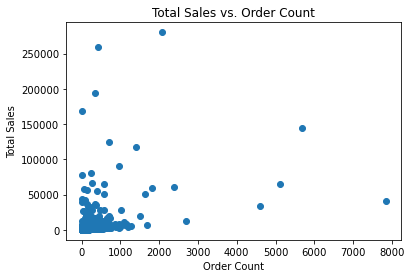

In [10]:
plt.scatter(df.OrderCount, df.Sales)  # x,y
plt.title('Total Sales vs. Order Count')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

- `plt.scatter(df.OrderCount, df.Sales)`: The function is plotting 'OrderCount' on the x-axis and 'Sales' on the y-axis.
- `plt.title('Total Sales vs. Order Count')`: This sets the title of the scatter plot.
- `plt.xlabel('Order Count')` and `plt.ylabel('Total Sales')`: These functions label the x-axis and y-axis.

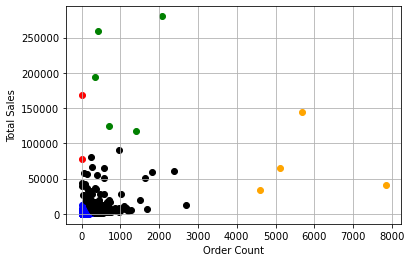

In [11]:
# With different cluster colors (loc can be omitted)

plt.scatter(df.loc[df.cluster==0].OrderCount, df.loc[df.cluster==0].Sales, c='blue')
plt.scatter(df.loc[df.cluster==1].OrderCount, df.loc[df.cluster==1].Sales, c='red')
plt.scatter(df.loc[df.cluster==2].OrderCount, df.loc[df.cluster==2].Sales, c='orange')
plt.scatter(df.loc[df.cluster==3].OrderCount, df.loc[df.cluster==3].Sales, c='green')
plt.scatter(df.loc[df.cluster==4].OrderCount, df.loc[df.cluster==4].Sales, c='black')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')
plt.grid()

- `The plt.scatter()` function is called multiple times to plot the points belonging to different clusters with different colors: Each line filters the DataFrame for a specific cluster (e.g., `df.loc[df.cluster==0])` and then plots 'OrderCount' against 'Sales' for that cluster.
- The `c` parameter is used to specify the color for the points in each cluster.
- `plt.grid()` adds a grid to the plot

### 8. Increase the number of times that k-means clustering will be run with different initial centroids to 20. What is the lowest SSE (some of squared error)? What is the actual number of runs to reach the solution (i.e., convergence)?

In [12]:
m = cluster.KMeans(init='k-means++', n_init=20, n_clusters=5).fit(x)
df['cluster'] = m.labels_
df.groupby('cluster').count()

,CustomerID,Sales,OrderCount,AvgOrderValue,z_Sales,z_OrdCnt,z_AvgOrdVal
cluster,,,,,,,
0,4054,4054,4054,4054,4054,4054,4054
1,2,2,2,2,2,2,2
2,5,5,5,5,5,5,5
3,4,4,4,4,4,4,4
4,273,273,273,273,273,273,273


- `init='k-means++'`(default): Selects initial cluster centers in a smart way to speed up convergence
  - e.g.) Select the first center randomly, find the points that are farther to the first center and assign the second cluster center nearby those points
- `init='random'`: Random initialization
- `n_init`: Number of times the algorithm is run with different initial centroid (default=10). Final results will be  the best output in terms of inertia.

In [13]:
m.inertia_  

2296.1372310080023

- `m.inertia_`: returns the lowest value of the sum of squared distance of samples to cluster center

In [14]:
m.n_iter_  

4

- `m.n_iter_`: returns the number of iterations that the algorithm executed until it converged.
    - The solution(convergence) was reached before 20 runs.
    - This number will be different every time you run the algorithm